In [22]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

# Import the trees from sklearn
from sklearn import tree

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score 

# Helper function for hyper-parameter turning.
from sklearn.model_selection import GridSearchCV

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

from scipy.spatial.distance import cdist

In [2]:
DF_Players = pd.read_csv('data/players.csv')

#display all of our columns
pd.set_option("display.max_columns", None)
DF_Players.head()



,match_id,account_id,hero_id,player_slot,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,denies,last_hits,stuns,hero_damage,hero_healing,tower_damage,item_0,item_1,item_2,item_3,item_4,item_5,level,leaver_status,xp_hero,xp_creep,xp_roshan,xp_other,gold_other,gold_death,gold_buyback,gold_abandon,gold_sell,gold_destroying_structure,gold_killing_heros,gold_killing_creeps,gold_killing_roshan,gold_killing_couriers,unit_order_none,unit_order_move_to_position,unit_order_move_to_target,unit_order_attack_move,unit_order_attack_target,unit_order_cast_position,unit_order_cast_target,unit_order_cast_target_tree,unit_order_cast_no_target,unit_order_cast_toggle,unit_order_hold_position,unit_order_train_ability,unit_order_drop_item,unit_order_give_item,unit_order_pickup_item,unit_order_pickup_rune,unit_order_purchase_item,unit_order_sell_item,unit_order_disassemble_item,unit_order_move_item,unit_order_cast_toggle_auto,unit_order_stop,unit_order_taunt,unit_order_buyback,unit_order_glyph,unit_order_eject_item_from_stash,unit_order_cast_rune,unit_order_ping_ability,unit_order_move_to_direction,unit_order_patrol,unit_order_vector_target_position,unit_order_radar,unit_order_set_item_combine_lock,unit_order_continue
0,0,0,86,0,3261,10960,347,362,9,3,18,1,30,76.7356,8690,218,143,180,37,73,56,108,0,16,0,8840.0,5440.0,NaN,83.0,50.0,-957.0,NaN,NaN,212.0,3120.0,5145.0,1087.0,400.0,NaN,NaN,4070.0,1.0,25.0,416.0,51.0,144.0,3.0,71.0,NaN,188.0,16.0,NaN,NaN,NaN,2.0,35.0,2.0,NaN,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
1,0,1,51,1,2954,17760,494,659,13,3,18,9,109,87.4164,23747,0,423,46,63,119,102,24,108,22,0,14331.0,8440.0,2683.0,671.0,395.0,-1137.0,NaN,NaN,1650.0,3299.0,6676.0,4317.0,937.0,NaN,NaN,5894.0,214.0,165.0,1031.0,98.0,39.0,4.0,439.0,NaN,346.0,22.0,NaN,NaN,12.0,52.0,30.0,4.0,NaN,21.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0,83,2,110,12195,350,385,0,4,15,1,58,None,4217,1595,399,48,60,59,108,65,0,17,0,6692.0,8112.0,NaN,453.0,259.0,-1436.0,-1015.0,NaN,NaN,3142.0,2418.0,3697.0,400.0,NaN,NaN,7053.0,3.0,132.0,645.0,36.0,160.0,20.0,373.0,NaN,643.0,17.0,5.0,NaN,7.0,8.0,28.0,NaN,1.0,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2,11,3,1179,22505,599,605,8,4,19,6,271,None,14832,2714,6055,63,147,154,164,79,160,21,0,8583.0,14230.0,894.0,293.0,100.0,-2156.0,NaN,NaN,938.0,4714.0,4104.0,10432.0,400.0,NaN,NaN,4712.0,133.0,163.0,690.0,9.0,15.0,7.0,406.0,NaN,150.0,21.0,NaN,NaN,1.0,9.0,45.0,7.0,NaN,14.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,67,4,3307,23825,613,762,20,3,17,13,245,None,33740,243,1833,114,92,147,0,137,63,24,0,15814.0,14325.0,NaN,62.0,NaN,-1437.0,-1056.0,NaN,4194.0,3217.0,7467.0,9220.0,400.0,NaN,NaN,3853.0,7.0,7.0,1173.0,31.0,84.0,8.0,198.0,NaN,111.0,23.0,1.0,NaN,NaN,2.0,44.0,6.0,NaN,13.0,NaN,NaN,NaN,1.0,3.0,NaN,NaN,23.0,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#display all of our rows
pd.set_option("display.max_rows", None)
DF_Players.isnull().sum()


match_id                                  0
account_id                                0
hero_id                                   0
player_slot                               0
gold                                      0
gold_spent                                0
gold_per_min                              0
xp_per_min                                0
kills                                     0
deaths                                    0
assists                                   0
denies                                    0
last_hits                                 0
stuns                                     0
hero_damage                               0
hero_healing                              0
tower_damage                              0
item_0                                    0
item_1                                    0
item_2                                    0
item_3                                    0
item_4                                    0
item_5                          

In [4]:
DF_Heroes = pd.read_csv('data/hero_names.csv')
DF_Heroes.head()

,name,hero_id,localized_name
0,npc_dota_hero_antimage,1,Anti-Mage
1,npc_dota_hero_axe,2,Axe
2,npc_dota_hero_bane,3,Bane
3,npc_dota_hero_bloodseeker,4,Bloodseeker
4,npc_dota_hero_crystal_maiden,5,Crystal Maiden


In [52]:
#Group onlythe data we need
player_Data = DF_Players[['hero_id','gold', 'gold_spent', 'gold_per_min', 
                          'xp_per_min', 'kills', 'deaths', 'assists', 'last_hits', 'hero_healing', 
                          'tower_damage', 'stuns', 'level', 'leaver_status', 'stuns', 'hero_damage']]

In [56]:
#Group our heroes!

#save our hero ID into a dictionary, pairing it with the heroe's name
hero = dict(zip(DF_Heroes['hero_id'],DF_Heroes['localized_name']))

#hero index 0 are not known
hero[0] = 'anonymous'

#create a new column hero in our database that has the hero ID replaced with the hero's localized_name
player_Data['hero'] = player_Data['hero_id'].apply(lambda id : hero[id])

<ipython-input-56-d28278e62a71>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  player_Data['hero'] = player_Data['hero_id'].apply(lambda id : hero[id])


In [57]:
#Move the hero column to the front of the dataframe by popping then inserting it 
name = 'hero'
col = player_Data.pop(name)

player_Data.insert(0, name, col)

In [58]:
player_Data.head()

,hero,hero_id,gold,gold_spent,gold_per_min,xp_per_min,kills,deaths,assists,last_hits,hero_healing,tower_damage,stuns,level,leaver_status,stuns,hero_damage
0,Rubick,86,3261,10960,347,362,9,3,18,30,218,143,76.7356,16,0,76.7356,8690
1,Clockwerk,51,2954,17760,494,659,13,3,18,109,0,423,87.4164,22,0,87.4164,23747
2,Treant Protector,83,110,12195,350,385,0,4,15,58,1595,399,None,17,0,None,4217
3,Shadow Fiend,11,1179,22505,599,605,8,4,19,271,2714,6055,None,21,0,None,14832
4,Spectre,67,3307,23825,613,762,20,3,17,245,243,1833,None,24,0,None,33740


In [59]:
#group our player_Data by the mean of each hero's stats
hero_Data = player_Data.groupby(['hero']).mean()

#drop all anonymous heroes 
hero_Data.drop('anonymous',inplace=True)

In [60]:
#print out our hero Data
print(hero_Data)

                     hero_id         gold    gold_spent  gold_per_min  \
hero                                                                    
Abaddon                102.0  1856.153474  11999.880665    363.055287   
Alchemist               73.0  2769.521633  24595.311005    709.545455   
Ancient Apparition      68.0  1662.564934  10969.666074    313.147046   
Anti-Mage                1.0  2392.246275  19535.906769    554.192742   
Axe                      2.0  1682.507933  13129.112150    400.109107   
Bane                     3.0  1512.149628   9834.171563    295.293380   
Batrider                65.0  1614.173624  12291.873814    362.856736   
Beastmaster             38.0  1757.401269  12555.392546    384.134814   
Bloodseeker              4.0  1821.146143  15626.151894    447.641746   
Bounty Hunter           62.0  2004.498160  13902.702782    412.049610   
Brewmaster              78.0  1807.365199  13749.436090    398.559613   
Bristleback             99.0  1847.077274  14113.65

In [78]:
from sklearn.cluster import KMeans
#Now we are going to cluster our heroes based on their stats

#take all the values that are going to matter to our cluster
cluster = hero_Data[['gold_per_min', 'deaths', 'assists', 'kills', 'xp_per_min', 'last_hits','tower_damage']]

#Use the elbow method to find optimal numbers of clusters

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)

for k in K: 
    kmeanModel = KMeans(n_clusters=k).fit(cluster)
    kmeanModel.fit(cluster)

    distortions.append(sum(np.min(cdist(cluster, kmeanModel.cluster_centers_,
                                        'euclidean'), axis=1)) / cluster.shape[0])
    inertias.append(kmeanModel.inertia_)
 
    mapping1[k] = sum(np.min(cdist(cluster, kmeanModel.cluster_centers_,
                                   'euclidean'), axis=1)) / cluster.shape[0]
    mapping2[k] = kmeanModel.inertia_

C:\Users\Anthony Viola\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Anthony Viola\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [79]:
#map our distortion
for key, val in mapping1.items():
    print(f'{key} : {val}')

1 : 796.1739385185583
2 : 414.2657723238807
3 : 278.85695603999187
4 : 192.32006265194855
5 : 169.75019547480642
6 : 147.90997617160883
7 : 133.99014755576883
8 : 124.19851104906733
9 : 112.22117997959987


In [80]:
#map our inertia
for key, val in mapping2.items():
    print(f'{key} : {val}')

1 : 96153405.7857561
2 : 25688526.754226413
3 : 11438463.6273533
4 : 5961431.435560333
5 : 4218259.135950727
6 : 3092701.99694633
7 : 2470294.54556648
8 : 2055150.9261998122
9 : 1658147.9019975774


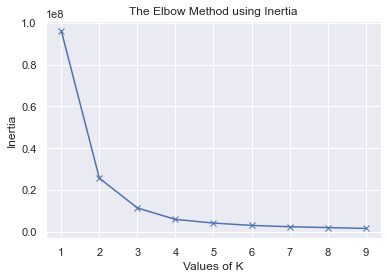

In [81]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
plt.show()

#from our graph, it seems that there seems to be very diminishing returns after 4 or 5 clusters. 

In [82]:
kmeans = KMeans(init="random", n_clusters=4,n_init=10,max_iter=3000, random_state=102)

#fit our cluster
kmeans.fit(cluster)

KMeans(init='random', max_iter=3000, n_clusters=4, random_state=102)

In [83]:
#generate the stats we are gonna use to label our heroes
cluster['kmeans'] = kmeans.labels_

kmeans_stats = cluster.groupby(['kmeans']).mean()

#normalize the data
kmeans_statmeans = kmeans_stats.mean(axis=0)

kmeans_range = kmeans_stats.max(axis=0) - kmeans_stats.min(axis=0)

kmeans_norm = (kmeans_stats - kmeans_statmeans) / kmeans_range



<ipython-input-83-94a8ad66a68c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster['kmeans'] = kmeans.labels_


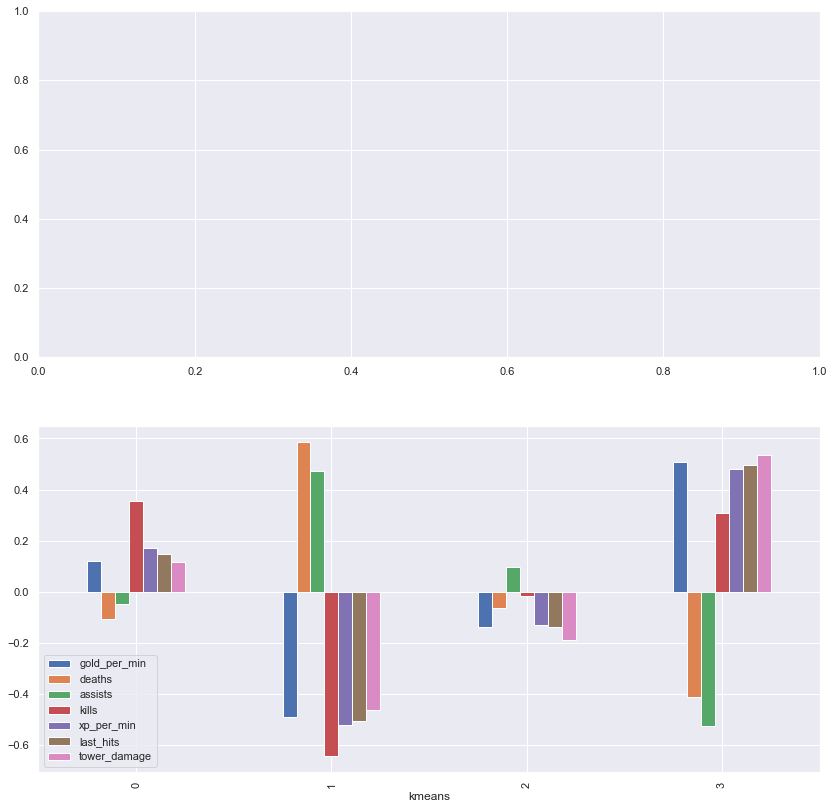

In [84]:
#Build our kmeans cluster
fig, (axis1, axis2) = plt.subplots(2,1,figsize=(14,14))

kmeans_norm.iloc[:,:7].plot.bar(ax=axis2).legend()

In [87]:
#4 Clusters is optimal. 

#Group 0: Soft-Carry
#Group 1: Support
#Group 2: Offlaner/All-rounder
#Group 3: Hard-Carry

#label our clusters
cluster.loc[(cluster['kmeans']==0),'hero_role'] = 'Soft-carry'
cluster.loc[(cluster['kmeans']==1),'hero_role'] = 'Support'
cluster.loc[(cluster['kmeans']==2),'hero_role'] = 'Offlaner/All-rounder'
cluster.loc[(cluster['kmeans']==3),'hero_role'] = 'Hard-Carry'

C:\Users\Anthony Viola\anaconda3\lib\site-packages\pandas\core\indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\Anthony Viola\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\Users\Anthony Viola\anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
T

In [88]:
cluster

,gold_per_min,deaths,assists,kills,xp_per_min,last_hits,tower_damage,kmeans,hero_role
hero,,,,,,,,,
Abaddon,363.055287,6.278550,12.647432,5.005740,417.260725,84.188822,1009.606949,2,Offlaner/All-rounder
Alchemist,709.545455,7.173369,11.647562,6.679019,577.001832,265.160847,2585.172758,3,Hard-Carry
Ancient Apparition,313.147046,7.492818,13.356286,4.826151,324.378054,48.930994,298.453280,1,Support
Anti-Mage,554.192742,5.449979,6.722222,7.340996,580.392827,298.673585,3081.401767,3,Hard-Carry
Axe,400.109107,9.365138,10.498153,8.525321,442.938274,136.269724,453.616605,1,Support
Bane,295.293380,7.721112,11.811986,4.766941,336.720329,32.764591,381.018801,1,Support
Batrider,362.856736,8.263757,14.039848,6.055977,418.428843,103.942125,268.393738,1,Support
Beastmaster,384.134814,7.912768,13.011895,5.455987,426.685170,111.848533,1491.495638,2,Offlaner/All-rounder
Bloodseeker,447.641746,9.190122,9.746279,9.657307,494.835927,165.670162,1449.624831,2,Offlaner/All-rounder


In [16]:
#hero_Data = player_Data.groupby(['hero']).mean()

pd.qcut(player_Data['gold_per_min'],5).value_counts()

#slice Trueskill rating into Dota ranking sections and label it 

(99.999, 300.0]    101351
(430.0, 524.0]     100062
(300.0, 364.0]      99715
(364.0, 430.0]      99590
(524.0, 1601.0]     99282
Name: gold_per_min, dtype: int64